In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

### Use yfinance to Extract Stock Data

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [117]:
import yfinance as yf

tesla_stock=yf.Ticker("TSLA")
tesla_history=tesla_stock.history(period="max")
tesla_data=tesla_history.reset_index()
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [125]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url).text

soup = BeautifulSoup(response, "html.parser")

table_body = soup.find_all("tbody")[1]

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in table_body.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) >= 2:  
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(",", "").replace("$", "")
        
        tesla_revenue = pd.concat([
            tesla_revenue,
            pd.DataFrame({"Date": [date], "Revenue": [revenue]})
        ], ignore_index=True)

tesla_revenue.dropna(inplace=True)
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"], errors="coerce")
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")

tesla_revenue.tail()


,Date,Revenue
49,2010-06-30,28.0
50,2010-03-31,21.0
51,2009-12-31,NaN
52,2009-09-30,46.0
53,2009-06-30,27.0


### Use yfinance to Extract Stock Data

In [56]:
import yfinance as yf
gme_stock=yf.Ticker("GME")
gme_history=gme_stock.history(period="max")
gme_data=gme_history.reset_index()
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Use Webscraping to Extract GME Revenue Data

In [141]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

table_body = soup.find_all("tbody")[1]

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in table_body.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) >= 2:  
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace(",", "").replace("$", "")
        
        gme_revenue = pd.concat([
            gme_revenue,
            pd.DataFrame({"Date": [date], "Revenue": [revenue]})
        ], ignore_index=True)

gme_revenue.dropna(inplace=True)
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"], errors="coerce")
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

gme_revenue.tail()


,Date,Revenue
49,2010-06-30,28.0
50,2010-03-31,21.0
51,2009-12-31,NaN
52,2009-09-30,46.0
53,2009-06-30,27.0


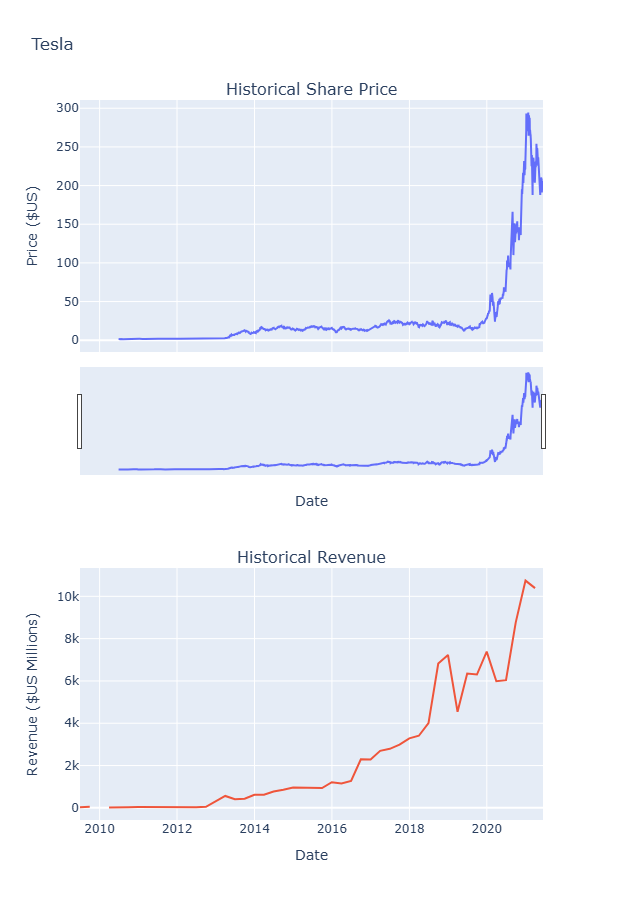

In [129]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

make_graph(tesla_data, tesla_revenue, 'Tesla')

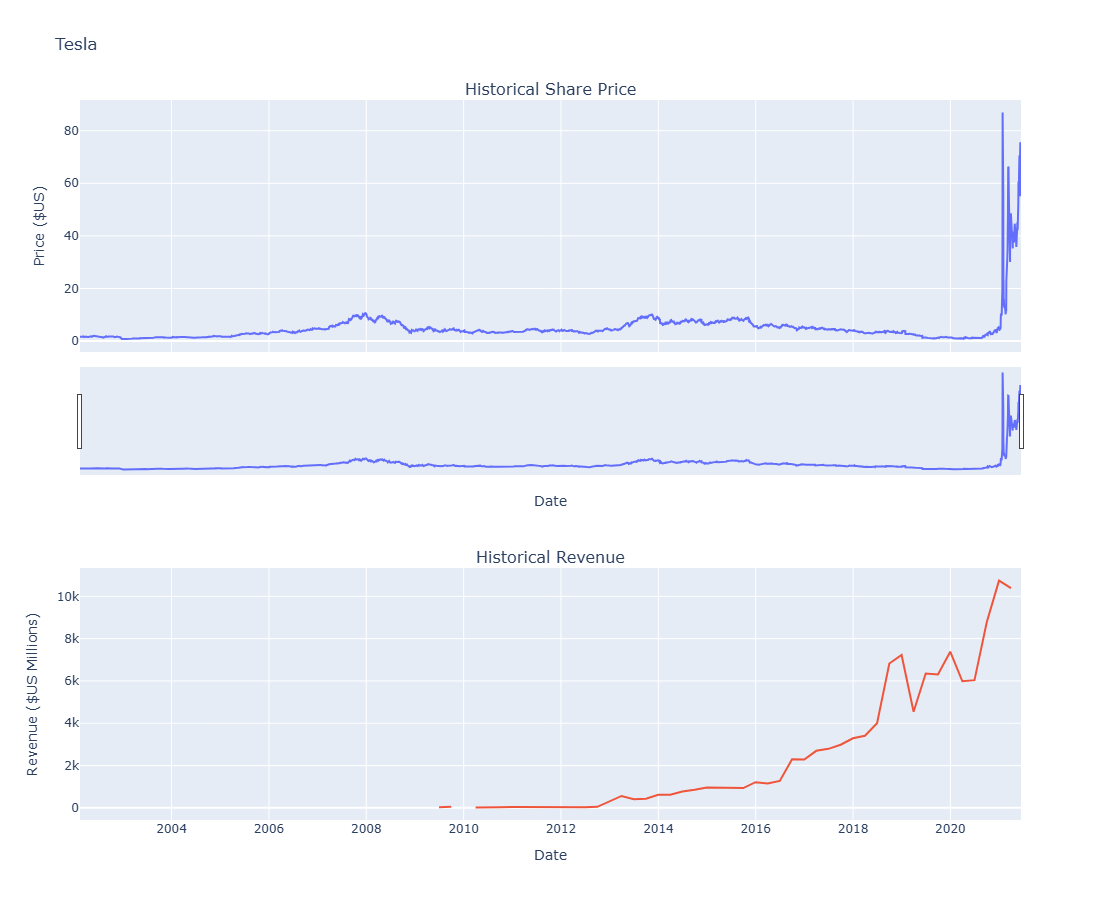

In [143]:
make_graph(gme_data, gme_revenue, 'Tesla')